We will use FunWeightClust on differential speeding data taken from speed surveys conducted by the City of Edmonotn during the summer months of 2017 and 2018. We are supposing that we willbe able to predict afternoon traffic (8:15AM - 11:45PM) from the morning traffic rush (12:00AM - 8:00AM). We will be using the measurements of cars going 5-10 km/h under the speed limit (Bin 2) and 0-5 km/h over the speed limit (Bin 4).

In [15]:
import pandas as pd

raw_traffic_data = pd.read_csv("data/Traffic/trafficdata.csv")

bin2 = raw_traffic_data.filter(like="Bin 2", axis=1)
bin4 = raw_traffic_data.filter(like="Bin 4", axis=1)


In [42]:
bin2_morning = bin2.loc[:, "Bin 2 00:00:00":"Bin 2 08:00:00"]
bin2_evening = bin2.loc[:, "Bin 2 08:15:00":"Bin 2 23:45:00"]

bin4_morning = bin4.loc[:, "Bin 4 00:00:00":"Bin 4 08:00:00"]
bin4_evening = bin4.loc[:, "Bin 4 08:15:00":"Bin 4 23:45:00"]

print(f"Morning Grid Lengths:\n\tBin 2:\t{bin2_morning.shape[1]}\n\tBin 4:\t{bin4_morning.shape[1]}")
print(f"Evening Grid Lengths:\n\tBin 2:\t{bin2_evening.shape[1]}\n\tBin 4:\t{bin4_evening.shape[1]}")

Morning Grid Lengths:
	Bin 2:	33
	Bin 4:	33
Evening Grid Lengths:
	Bin 2:	63
	Bin 4:	63


Let's plot our raw data. To begin, we must generate the grid points before converting to functional data.

In [49]:
import numpy as np

morning_grid = []
for i in range(8):
    morning_grid += [i, i + (1/4), i + (2/4), i + (3/4)]

morning_grid += [8]

evening_grid = []
for i in range(8, 24):
    if i == 23:
        evening_grid += [i + (1/4), i + (2/4), i + (3/4)]
    else:
        evening_grid += [i + (1/4), i + (2/4), i + (3/4), i + 1]

morning_grid = np.array(morning_grid)
evening_grid = np.array(evening_grid)


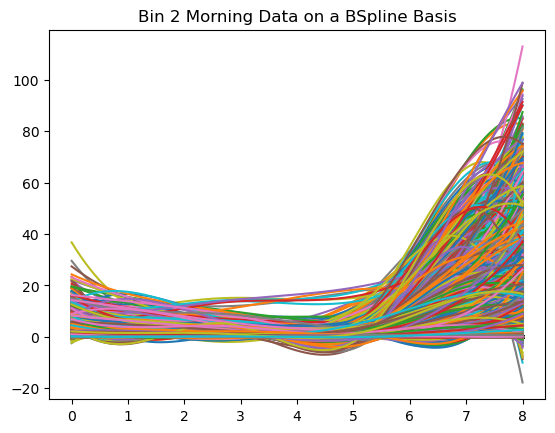

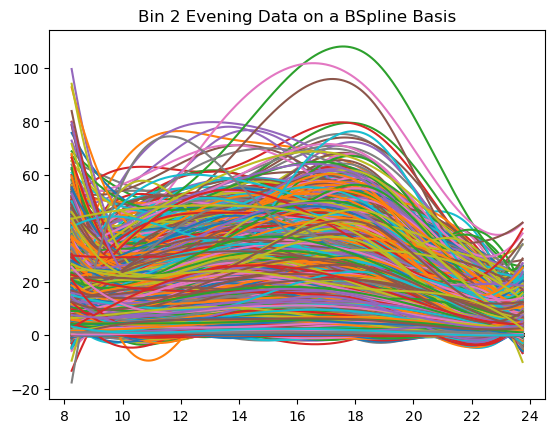

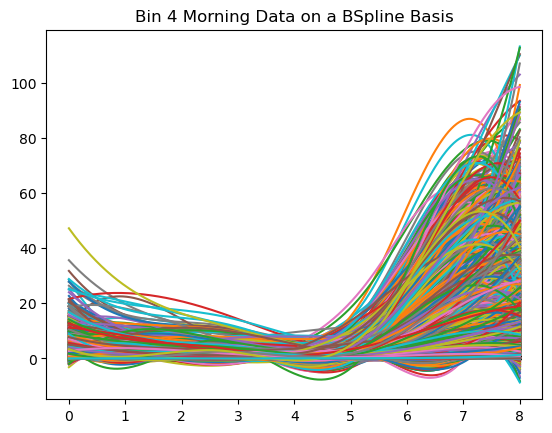

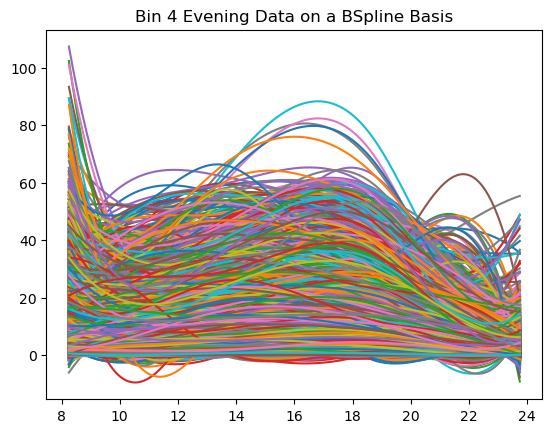

In [54]:
from skfda.representation import FDataGrid
from skfda.representation.basis import BSplineBasis
import matplotlib.pyplot as plt
bin2_predictor = FDataGrid(data_matrix=bin2_morning.values, grid_points=morning_grid).to_basis(BSplineBasis(n_basis=6))
bin2_response = FDataGrid(data_matrix=bin2_evening.values, grid_points=evening_grid).to_basis(BSplineBasis(n_basis=6))

bin2_predictor.plot()
plt.title("Bin 2 Morning Data on a BSpline Basis")
plt.show()

bin2_response.plot()
plt.title("Bin 2 Evening Data on a BSpline Basis")
plt.show()

bin4_predictor = FDataGrid(data_matrix=bin4_morning.values, grid_points=morning_grid).to_basis(BSplineBasis(n_basis=6))
bin4_response = FDataGrid(data_matrix=bin4_evening.values, grid_points=evening_grid).to_basis(BSplineBasis(n_basis=6))

bin4_predictor.plot()
plt.title("Bin 4 Morning Data on a BSpline Basis")
plt.show()

bin4_response.plot()
plt.title("Bin 4 Evening Data on a BSpline Basis")
plt.show()

In [68]:
#Placing both bin2 and bin4 data into the same FDataGrid object for processing
fdx = bin2_predictor.concatenate(bin4_predictor)
fdy = bin2_response.concatenate(bin4_response)

import funweightclust as fwc
models = ["ABQKDK"]
modelsy = ["EVI"]

res = fwc.funweightclust(datax=fdx, datay=fdy, K=4, model=models, modely=modelsy, threshold=0.005, d_select="cattell", mc_cores=1)

FunWeightClust:  12.4 mins  |  Approx. remaining:       0.0 secs  |    100% complete 

     Model ModelY  K Threshold Complexity            BIC
1   ABQKDK    EVI  4     0.005     110.00  -2,399,604.93
2   ABQKDK    EVI  4     0.005     109.00  -2,399,878.59
3   ABQKDK    EVI  4     0.005     110.00  -2,399,983.30
4   ABQKDK    EVI  4     0.005     109.00  -2,400,505.36
5   ABQKDK    EVI  4     0.005     110.00  -2,400,613.69
6   ABQKDK    EVI  4     0.005     110.00  -2,400,778.62
7   ABQKDK    EVI  4     0.005     109.00  -2,400,980.86
8   ABQKDK    EVI  4     0.005     109.00  -2,400,980.86
9   ABQKDK    EVI  4     0.005     110.00  -2,401,830.97
10  ABQKDK    EVI  4     0.005     110.00  -2,402,299.00
11  ABQKDK    EVI  4     0.005     110.00  -2,402,680.11
12  ABQKDK    EVI  4     0.005     110.00  -2,402,680.32
13  ABQKDK    EVI  4     0.005     109.00  -2,402,685.65
14  ABQKDK    EVI  4     0.005     110.00  -2,403,030.78
15  ABQKDK    EVI  4     0.005     109.00  -2,403,678.43
1

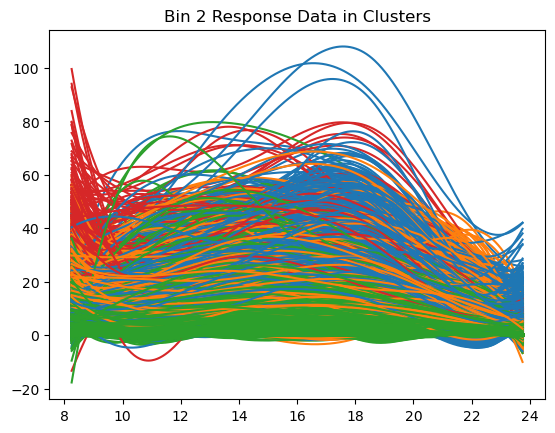

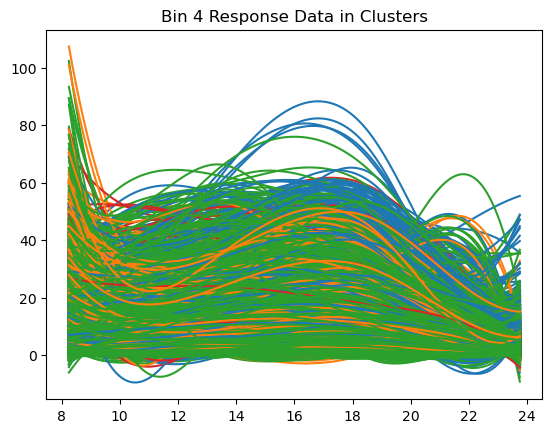

In [70]:
bin2_response.plot(group=res.cl)
plt.title("Bin 2 Response Data in Clusters")
plt.show()

bin4_response.plot(group=res.cl)
plt.title("Bin 4 Response Data in Clusters")
plt.show()